In [1]:
import warnings

warnings.filterwarnings(action='ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [65]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('standard_df_final.csv',index_col = 0)
df['code'] = df.code.apply(lambda x : str(x).zfill(6))
df['Index_return_6'] = df['Index_return_6']/100
df['Index_return_1Y'] = df['Index_return_1Y']/100
df

,작성일,개장일,Market,Name,code,Sector,adjusted_Open,adjusted_Close,report_Open,report_Close,괴리율,adjusted_TargetPrice,report_TargetPrice,액면비율,Index_return_6,Index_return_1Y,6month_개장일,6month_return,6month_log_return,6month_Close,1year_개장일,1Year_return,1Year_log_return,1Year_Close,투자의견,idx,작성자,제공출처
0,2018-04-18,2018-04-18,^KS11,한화생명,088350,보험업,6160.0,6160.0,6160,6160,0.785714,11000.00000,11000,1.000000,-0.135025,-0.107344,2018-10-15,-0.239448,-0.273711,4685.0,2019-04-18,-0.356331,-0.440571,3965.0,buy,473108,박혜진,이베스트증권
1,2018-05-31,2018-05-31,^KS11,한화생명,088350,보험업,5740.0,5570.0,5740,5570,0.620209,9300.00000,9300,1.000000,-0.133549,-0.157354,2018-11-27,-0.213645,-0.240346,4380.0,2019-05-31,-0.423698,-0.551124,3210.0,buy,479661,성용훈,한화투자증권
2,2018-09-18,2018-09-18,^KS11,한화생명,088350,보험업,4880.0,4860.0,4880,4860,0.229508,6000.00000,6000,1.000000,-0.057545,-0.103184,2019-03-15,-0.134774,-0.144764,4205.0,2019-09-18,-0.466049,-0.627452,2595.0,buy,493832,김지영,교보증권
3,2021-02-19,2021-02-19,^KS11,한화생명,088350,보험업,3120.0,3230.0,3120,3230,0.121795,3500.00000,3500,1.000000,0.016511,NaN,2021-08-18,0.043344,0.042431,3370.0,2022-02-18,NaN,NaN,NaN,buy,583203,정태준,유안타증권
4,2012-11-09,2012-11-09,^KS11,한화생명,088350,보험업,7410.0,7330.0,7410,7330,0.214575,9000.00000,9000,1.000000,0.027326,0.042249,2013-05-08,-0.075034,-0.077998,6780.0,2013-11-08,-0.096862,-0.101880,6620.0,buy,293653,이치영,이트레이드증권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20288,2015-03-17,2015-03-17,^KS11,사조산업,007160,어로 어업,79600.0,78500.0,79600,78500,1.010050,160000.00000,160000,1.000000,-0.043618,-0.027100,2015-09-11,0.014013,0.013915,79600.0,2016-03-16,-0.185987,-0.205779,63900.0,strongbuy,345498,김승,SK증권
20289,2015-06-12,2015-06-12,^KS11,까뮤이앤씨,013700,건물 건설업,1245.0,1235.0,12450,12350,0.927711,2400.00000,24000,0.100000,-0.050644,-0.016831,2015-12-09,-0.004049,-0.004057,1230.0,2016-06-10,0.004049,0.004040,1240.0,strongbuy,353325,"이태경,한기현",현대증권
20290,2015-06-01,2015-06-01,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6425.0,6675.0,12850,13350,0.867704,12000.00000,24000,0.500000,-0.030067,-0.024143,2015-11-27,-0.319101,-0.384341,4545.0,2016-05-31,-0.486142,-0.665809,3430.0,strongbuy,352285,이상우,유진투자증권
20291,2015-03-17,2015-03-17,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6750.0,7075.0,13500,14150,0.777778,12000.00000,24000,0.500000,0.053172,0.090229,2015-09-11,-0.226148,-0.256375,5475.0,2016-03-16,-0.492580,-0.678415,3590.0,strongbuy,345568,이상우,유진투자증권


In [66]:
df.insert(17, '6month_return_index', df['6month_return'] - df['Index_return_6'])
df.insert(22, '1Year_return_index', df['1Year_return'] - df['Index_return_1Y'])

In [67]:
df

,작성일,개장일,Market,Name,code,Sector,adjusted_Open,adjusted_Close,report_Open,report_Close,괴리율,adjusted_TargetPrice,report_TargetPrice,액면비율,Index_return_6,Index_return_1Y,6month_개장일,6month_return_index,6month_return,6month_log_return,6month_Close,1year_개장일,1Year_return_index,1Year_return,1Year_log_return,1Year_Close,투자의견,idx,작성자,제공출처
0,2018-04-18,2018-04-18,^KS11,한화생명,088350,보험업,6160.0,6160.0,6160,6160,0.785714,11000.00000,11000,1.000000,-0.135025,-0.107344,2018-10-15,-0.104423,-0.239448,-0.273711,4685.0,2019-04-18,-0.248988,-0.356331,-0.440571,3965.0,buy,473108,박혜진,이베스트증권
1,2018-05-31,2018-05-31,^KS11,한화생명,088350,보험업,5740.0,5570.0,5740,5570,0.620209,9300.00000,9300,1.000000,-0.133549,-0.157354,2018-11-27,-0.080096,-0.213645,-0.240346,4380.0,2019-05-31,-0.266345,-0.423698,-0.551124,3210.0,buy,479661,성용훈,한화투자증권
2,2018-09-18,2018-09-18,^KS11,한화생명,088350,보험업,4880.0,4860.0,4880,4860,0.229508,6000.00000,6000,1.000000,-0.057545,-0.103184,2019-03-15,-0.077229,-0.134774,-0.144764,4205.0,2019-09-18,-0.362865,-0.466049,-0.627452,2595.0,buy,493832,김지영,교보증권
3,2021-02-19,2021-02-19,^KS11,한화생명,088350,보험업,3120.0,3230.0,3120,3230,0.121795,3500.00000,3500,1.000000,0.016511,NaN,2021-08-18,0.026833,0.043344,0.042431,3370.0,2022-02-18,NaN,NaN,NaN,NaN,buy,583203,정태준,유안타증권
4,2012-11-09,2012-11-09,^KS11,한화생명,088350,보험업,7410.0,7330.0,7410,7330,0.214575,9000.00000,9000,1.000000,0.027326,0.042249,2013-05-08,-0.102360,-0.075034,-0.077998,6780.0,2013-11-08,-0.139111,-0.096862,-0.101880,6620.0,buy,293653,이치영,이트레이드증권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20288,2015-03-17,2015-03-17,^KS11,사조산업,007160,어로 어업,79600.0,78500.0,79600,78500,1.010050,160000.00000,160000,1.000000,-0.043618,-0.027100,2015-09-11,0.057630,0.014013,0.013915,79600.0,2016-03-16,-0.158888,-0.185987,-0.205779,63900.0,strongbuy,345498,김승,SK증권
20289,2015-06-12,2015-06-12,^KS11,까뮤이앤씨,013700,건물 건설업,1245.0,1235.0,12450,12350,0.927711,2400.00000,24000,0.100000,-0.050644,-0.016831,2015-12-09,0.046595,-0.004049,-0.004057,1230.0,2016-06-10,0.020880,0.004049,0.004040,1240.0,strongbuy,353325,"이태경,한기현",현대증권
20290,2015-06-01,2015-06-01,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6425.0,6675.0,12850,13350,0.867704,12000.00000,24000,0.500000,-0.030067,-0.024143,2015-11-27,-0.289034,-0.319101,-0.384341,4545.0,2016-05-31,-0.461999,-0.486142,-0.665809,3430.0,strongbuy,352285,이상우,유진투자증권
20291,2015-03-17,2015-03-17,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6750.0,7075.0,13500,14150,0.777778,12000.00000,24000,0.500000,0.053172,0.090229,2015-09-11,-0.279320,-0.226148,-0.256375,5475.0,2016-03-16,-0.582808,-0.492580,-0.678415,3590.0,strongbuy,345568,이상우,유진투자증권


<AxesSubplot:ylabel='Frequency'>

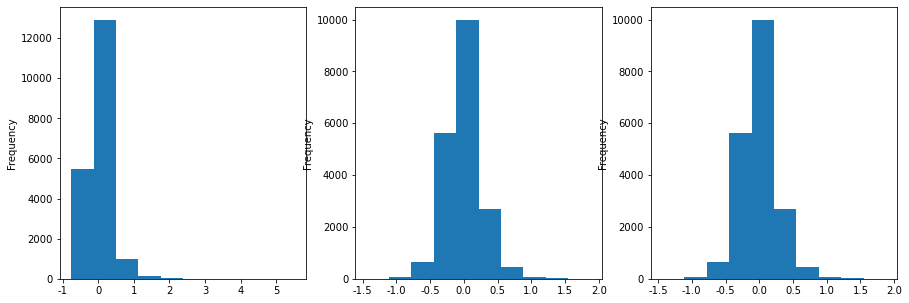

In [15]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
df['6month_return'].plot(kind='hist', ax = axes[0])
df['6month_log_return'].plot(kind='hist', ax = axes[1])
np.log1p(df['6month_return']).plot(kind='hist', ax = axes[2])

<AxesSubplot:ylabel='Frequency'>

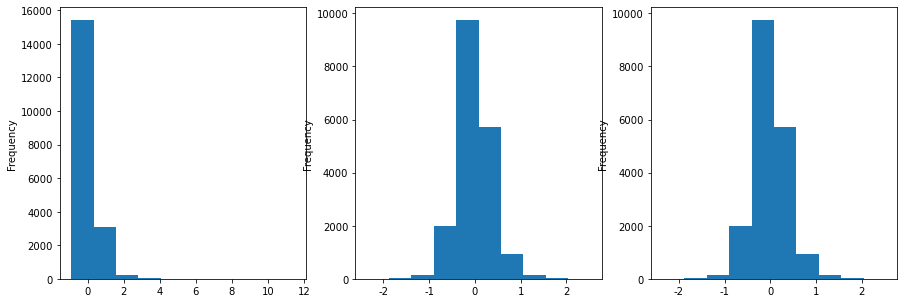

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
df['1Year_return'].plot(kind='hist', ax = axes[0])
df['1Year_log_return'].plot(kind='hist', ax = axes[1])
np.log1p(df['1Year_return']).plot(kind='hist', ax = axes[2])

<AxesSubplot:xlabel='투자의견'>

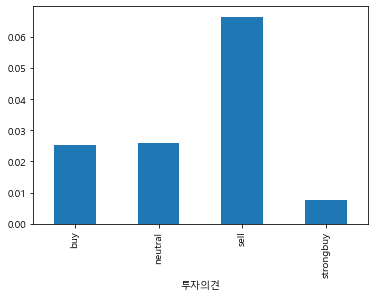

In [172]:
df.groupby('투자의견')['6month_return'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='투자의견'>

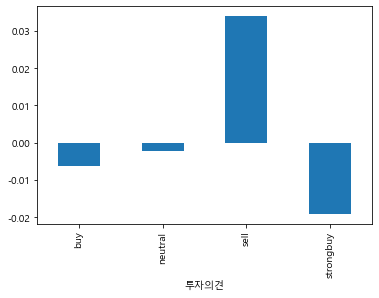

In [160]:
df.groupby('투자의견')['6month_return_index'].mean().plot(kind='bar')

<AxesSubplot:xlabel='투자의견'>

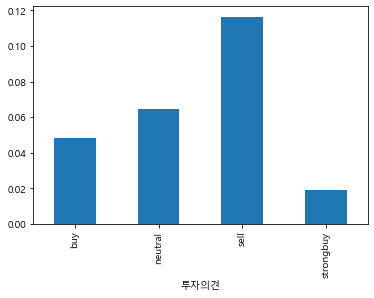

In [163]:
df.groupby('투자의견')['1Year_return'].mean().plot(kind='bar')

<AxesSubplot:xlabel='투자의견'>

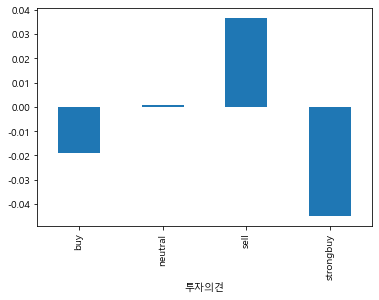

In [164]:
df.groupby('투자의견')['1Year_return_index'].mean().plot(kind='bar')

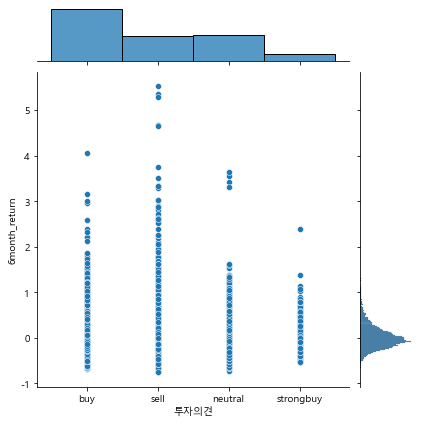

In [33]:
sns.jointplot(x = df.투자의견, y = df['6month_return'], data=df)

In [62]:
a=df[df['6month_return'] > 1]

<AxesSubplot:>

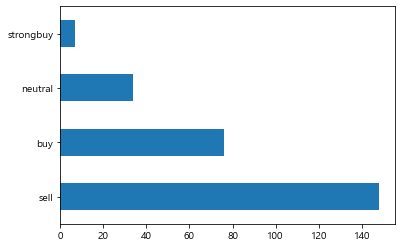

In [63]:
a.투자의견.value_counts().plot(kind = 'barh')

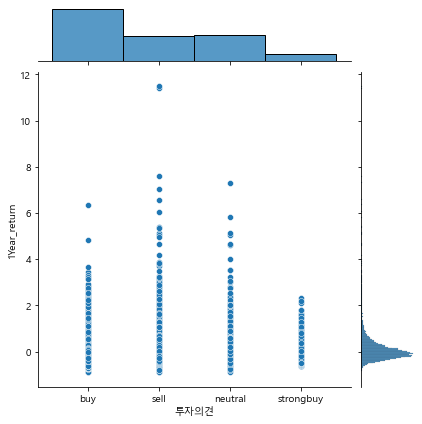

In [50]:
sns.jointplot(x = df.투자의견, y = df['1Year_return'], data=df)

In [59]:
df[df['1Year_return'] > 10]

,작성일,개장일,Market,Name,code,Sector,adjusted_Open,adjusted_Close,report_Open,report_Close,괴리율,adjusted_TargetPrice,report_TargetPrice,액면비율,Index_return_6,Index_return_1Y,6month_개장일,6month_return,6month_log_return,6month_Close,1year_개장일,1Year_return,1Year_log_return,1Year_Close,투자의견,idx,작성자,제공출처
17796,2019-09-09,2019-09-09,^KQ11,알테오젠,196170,자연과학 및 공학 연구개발업,11336.701337,11220.0,34000,33650,-1.0,0.0,0,0.333432,2.708655,40.353477,2020-03-06,1.772727,1.019831,31110.0,2020-09-08,11.400446,2.517732,139133.0,sell,537532,최석원,이베스트증권
19366,2019-07-30,2019-07-30,^KS11,신풍제약,019170,의약품 제조업,5890.000000,6000.0,5890,6000,-1.0,0.0,0,1.000000,10.175693,11.011039,2020-01-23,0.266667,0.236389,7600.0,2020-07-29,11.500000,2.525729,75000.0,sell,533432,임동락,한양증권


In [57]:
a=df[df['1Year_return'] > 1]

<AxesSubplot:>

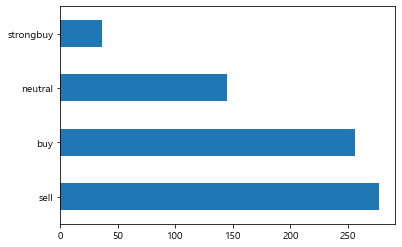

In [58]:
a.투자의견.value_counts().plot(kind = 'barh')

<AxesSubplot:>

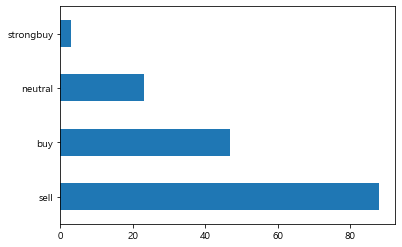

In [54]:
a=df[df['1Year_return'] > 2]
a.투자의견.value_counts().plot(kind = 'barh')

<AxesSubplot:xlabel='6month_return', ylabel='1Year_return'>

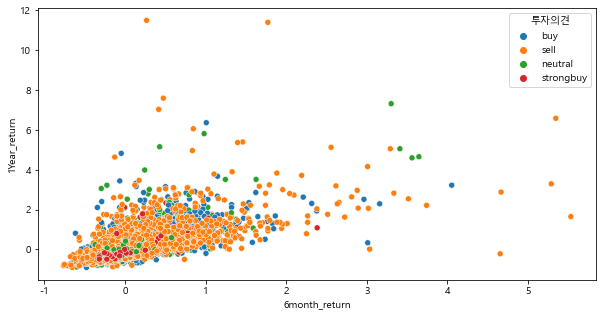

In [155]:
fig= plt.figure(figsize=(10,5))
sns.scatterplot(x = df['6month_return'], y= df['1Year_return'], data =df , hue='투자의견')

<AxesSubplot:xlabel='Index_return_6', ylabel='Index_return_1Y'>

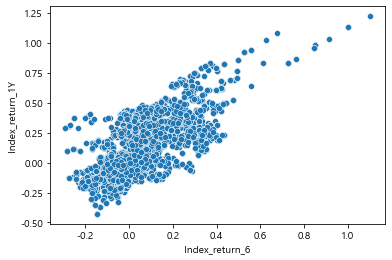

In [127]:
sns.scatterplot(x = df['Index_return_6'], y= df['Index_return_1Y'], data =df )

<AxesSubplot:xlabel='6month_return_index', ylabel='1Year_return_index'>

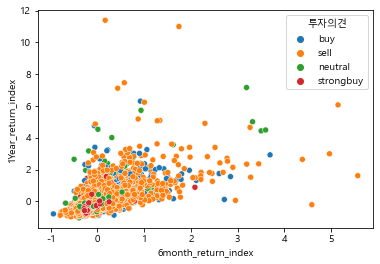

In [219]:
sns.scatterplot(x = df['6month_return_index'], y= df['1Year_return_index'], data =df , hue='투자의견')

In [129]:
df[df['Index_return_6'] > 0.7]

,작성일,개장일,Market,Name,code,Sector,adjusted_Open,adjusted_Close,report_Open,report_Close,괴리율,adjusted_TargetPrice,report_TargetPrice,액면비율,Index_return_6,Index_return_1Y,6month_개장일,6month_return_index,6month_return,6month_log_return,6month_Close,1year_개장일,1Year_return_index,1Year_return,1Year_log_return,1Year_Close,투자의견,idx,작성자,제공출처
4694,2020-03-19,2020-03-19,^KQ11,에스엠,041510,오디오물 출판 및 원판 녹음업,20700.000000,19000.0,20700,19000,0.400966,29000.000000,29000,1.000000,1.099825,1.222738,2020-09-15,-0.118246,0.981579,0.683894,37650.0,2021-03-19,-0.633265,0.589474,0.463403,30200.0,buy,554184,김현용,이베스트증권
8495,2020-03-20,2020-03-20,^KQ11,CJ프레시웨이,051500,음·식료품 및 담배 도매업,11800.000000,13200.0,11800,13200,1.288136,27000.000000,27000,1.000000,0.916152,1.035510,2020-09-16,-0.560091,0.356061,0.304584,17900.0,2021-03-19,-0.171874,0.863636,0.622530,24600.0,buy,554368,남성현,한화투자증권
10073,2020-03-24,2020-03-24,^KQ11,네오위즈,095660,소프트웨어 개발 및 공급업,13350.000000,13900.0,13350,13900,0.573034,21000.000000,21000,1.000000,0.850291,0.985470,2020-09-18,0.307982,1.158273,0.769309,30000.0,2021-03-24,-0.287629,0.697842,0.529358,23600.0,buy,554618,이민아,대신증권
13704,2020-03-23,2020-03-23,^KQ11,와이솔,122990,전자부품 제조업,7890.000000,7500.0,7890,7500,0.647655,13000.000000,13000,1.000000,1.003065,1.132481,2020-09-18,0.310269,1.313333,0.838689,17350.0,2021-03-23,-0.439148,0.693333,0.526699,12700.0,buy,554455,고의영,하이투자증권
14705,2020-03-23,2020-03-23,^KQ11,티씨케이,064760,기타 비금속 광물제품 제조업,50000.000000,51000.0,50000,51000,0.620000,81000.000000,81000,1.000000,1.003065,1.132481,2020-09-18,-0.036398,0.966667,0.676340,100300.0,2021-03-23,1.520460,2.652941,1.295533,186300.0,buy,554385,"김경민, 김주연",하나금융투자
15809,2020-03-17,2020-03-17,^KQ11,아이티엠반도체,084850,전자부품 제조업,41500.000000,43300.0,41500,43300,-1.000000,0.000000,0,1.000000,0.726031,0.833544,2020-09-11,-0.296470,0.429561,0.357368,61900.0,2021-03-17,-0.768879,0.064665,0.062660,46100.0,sell,553985,이동주,SK증권
16153,2020-03-24,2020-03-24,^KQ11,펄어비스,263750,소프트웨어 개발 및 공급업,32300.000000,33140.0,161500,165700,0.052632,34000.000000,170000,0.200000,0.850291,0.985470,2020-09-18,-0.684932,0.165359,0.153029,38620.0,2021-03-24,-0.111602,0.873868,0.628005,62100.0,neutral,554615,이민아,대신증권
16934,2020-03-17,2020-03-17,^KQ11,도이치모터스,067990,자동차 판매업,5047.859402,5588.0,5140,5690,1.918288,14731.107206,15000,0.982074,0.726031,0.833544,2020-09-11,-0.580004,0.146027,0.136301,6404.0,2021-03-17,-0.627388,0.206156,0.187438,6740.0,buy,553981,한동희,키움증권
17528,2020-03-18,2020-03-18,^KQ11,오이솔루션,138080,통신 및 방송 장비 제조업,34050.000000,33450.0,34050,33450,-1.000000,0.000000,0,1.000000,0.843117,0.957847,2020-09-14,0.112040,0.955157,0.670470,65400.0,2021-03-18,-0.542302,0.415546,0.347515,47350.0,sell,554166,정지수,메리츠종금증권
17600,2020-03-16,2020-03-16,^KQ11,서부T&D,006730,일반 및 생활 숙박시설 운영업,5186.567901,4774.0,5280,4860,-1.000000,0.000000,0,0.982305,0.760996,0.864482,2020-09-11,-0.388562,0.372434,0.316586,6552.0,2021-03-16,-0.167792,0.696690,0.528680,8100.0,sell,553848,김세련,이베스트증권


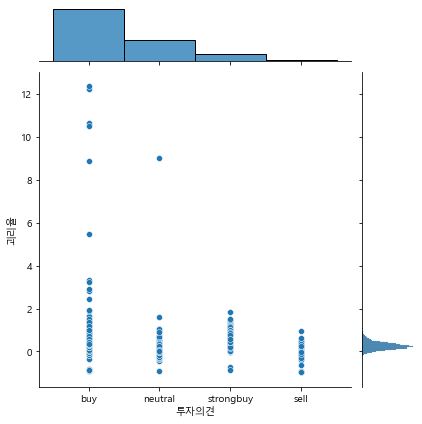

In [139]:
df_op = df[['괴리율','투자의견']]
df_op = df_op.drop(df_op[(df_op.괴리율== -1 ) | (df_op.괴리율== 'inf' )|(df_op.괴리율.isnull())].index.tolist(), axis=0)
df_op = df_op[df_op.괴리율 < 20]
df_op.dropna(inplace=True)
sns.jointplot(x = df_op['투자의견'], y = df_op.괴리율, data=df_op)

In [143]:
df.loc[df_op[df_op.괴리율 > 5].index.tolist()]

,작성일,개장일,Market,Name,code,Sector,adjusted_Open,adjusted_Close,report_Open,report_Close,괴리율,adjusted_TargetPrice,report_TargetPrice,액면비율,Index_return_6,Index_return_1Y,6month_개장일,6month_return_index,6month_return,6month_log_return,6month_Close,1year_개장일,1Year_return_index,1Year_return,1Year_log_return,1Year_Close,투자의견,idx,작성자,제공출처
3286,2020-11-06,2020-11-06,^KS11,KT&G,033780,담배 제조업,83900.000000,82900.0,83900,82900,12.230036,1.110000e+06,1110000,1.000000,0.302450,0.228748,2021-05-04,-0.303656,-0.001206,-0.001207,82800.0,2021-11-05,-0.190147,0.038601,0.037874,86100.0,buy,575004,김태현,IBK투자증권
4641,2019-01-28,2019-01-28,^KS11,현대모비스,012330,자동차 신품 부품 제조업,220500.000000,217500.0,220500,217500,10.632653,2.565000e+06,2565000,1.000000,-0.050999,-0.000266,2019-07-26,0.179735,0.128736,0.121098,245500.0,2020-01-28,0.126703,0.126437,0.119059,245000.0,buy,510503,"송선재,구성종",하나금융투자
7866,2014-07-16,2014-07-16,^KS11,롯데칠성,005300,비알코올음료 및 얼음 제조업,188117.359935,184217.0,1881000,1842000,8.994684,1.880174e+06,18800000,0.100009,-0.045955,0.036956,2015-01-12,-0.081628,-0.127583,-0.136488,160714.0,2015-07-16,0.270318,0.307273,0.267944,240822.0,neutral,328531,"송광수,박지은",메리츠종금증권
10497,2021-10-29,2021-10-29,^KS11,DGB금융지주,139130,기타 금융업,10350.000000,10350.0,2170,2170,5.451613,6.677419e+04,14000,4.769585,NaN,NaN,2022-04-27,NaN,NaN,NaN,NaN,2022-10-28,NaN,NaN,NaN,NaN,buy,600046,서영수,키움증권
13026,2015-11-09,2015-11-09,^KS11,JB금융지주,175330,기타 금융업,5990.000000,5980.0,5990,5980,12.355593,8.000000e+04,80000,1.000000,-0.024184,-0.011018,2016-05-04,-0.051067,-0.075251,-0.078233,5530.0,2016-11-08,-0.024099,-0.035117,-0.035748,5770.0,buy,365362,전배승,이베스트증권
14092,2017-06-20,2017-06-20,^KQ11,제넥신,095700,자연과학 및 공학 연구개발업,52300.000000,49600.0,52300,49600,10.472275,6.000000e+05,600000,1.000000,0.152986,0.255090,2017-12-15,-0.021937,0.131048,0.123145,56100.0,2018-06-20,0.585635,0.840726,0.610160,91300.0,buy,431320,"선민정,이동건",하나대투증권
17931,2020-11-20,2020-11-20,^KQ11,윈스,136540,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",17017.985612,17100.0,2075,2085,8.879518,1.681295e+05,20500,8.201439,0.113678,NaN,2021-05-18,-0.125374,-0.011696,-0.011765,16900.0,2021-11-19,NaN,NaN,NaN,NaN,buy,576741,정지수,메리츠증권


<AxesSubplot:xlabel='괴리율', ylabel='6month_return'>

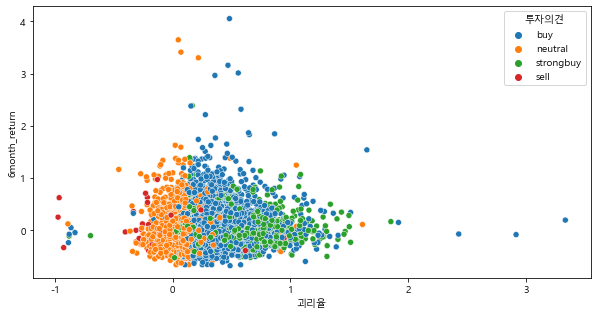

In [154]:
df_op = df.copy()
df_op = df_op.drop(df_op[(df_op.괴리율== -1 ) | (df_op.괴리율== 'inf' )|(df_op.괴리율.isnull())].index.tolist(), axis=0)
df_op = df_op[df_op.괴리율 < 5]
df_op.dropna(inplace=True)
fig= plt.figure(figsize=(10,5))
sns.scatterplot(x = df_op['괴리율'], y= df_op['6month_return'], data =df_op , hue='투자의견')

<AxesSubplot:xlabel='괴리율', ylabel='1Year_return'>

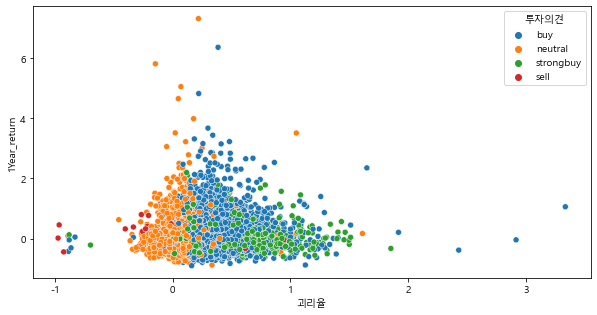

In [152]:
df_op = df.copy()
df_op = df_op.drop(df_op[(df_op.괴리율== -1 ) | (df_op.괴리율== 'inf' )|(df_op.괴리율.isnull())].index.tolist(), axis=0)
df_op = df_op[df_op.괴리율 < 5]
df_op.dropna(inplace=True)
fig= plt.figure(figsize=(10,5))
sns.scatterplot(x = df_op['괴리율'], y= df_op['1Year_return'], data =df_op , hue='투자의견')

<AxesSubplot:xlabel='제공출처'>

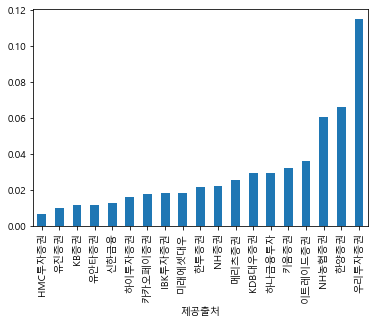

In [182]:
df.groupby('제공출처')['6month_return_index'].mean().sort_values()[20:].plot(kind='bar')

<AxesSubplot:xlabel='제공출처'>

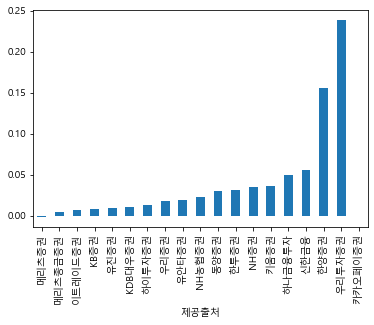

In [184]:
df.groupby('제공출처')['1Year_return_index'].mean().sort_values()[20:].plot(kind='bar')

<AxesSubplot:xlabel='제공출처'>

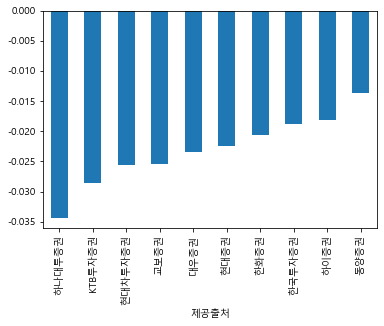

In [177]:
df.groupby('제공출처')['6month_return_index'].mean().sort_values()[:10].plot(kind='bar')

<AxesSubplot:xlabel='제공출처'>

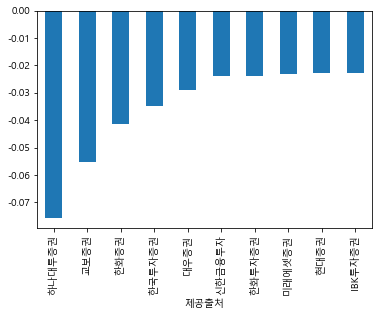

In [185]:
df.groupby('제공출처')['1Year_return_index'].mean().sort_values()[:10].plot(kind='bar')

<AxesSubplot:ylabel='제공출처'>

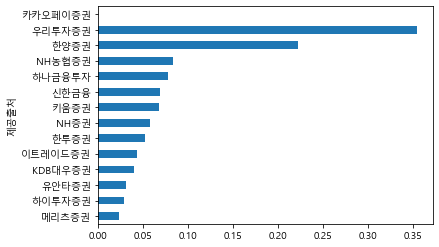

In [192]:
(df.groupby('제공출처')['1Year_return_index'].mean() + df.groupby('제공출처')['6month_return_index'].mean()).sort_values()[25:].plot(kind='barh')

<AxesSubplot:ylabel='제공출처'>

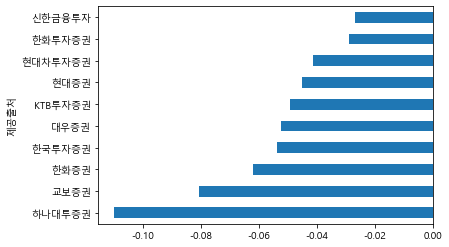

In [190]:
(df.groupby('제공출처')['1Year_return_index'].mean() + df.groupby('제공출처')['6month_return_index'].mean()).sort_values()[:10].plot(kind='barh')

In [ ]:
##############

<AxesSubplot:>

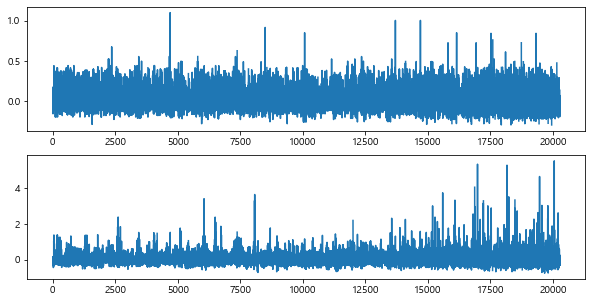

In [106]:
fig, axes = plt.subplots(2,1 ,figsize=(10,5))
df['Index_return_6'].plot(ax = axes[0])
df['6month_return'].plot(ax=axes[1])

<AxesSubplot:xlabel='1Year_return_index', ylabel='Count'>

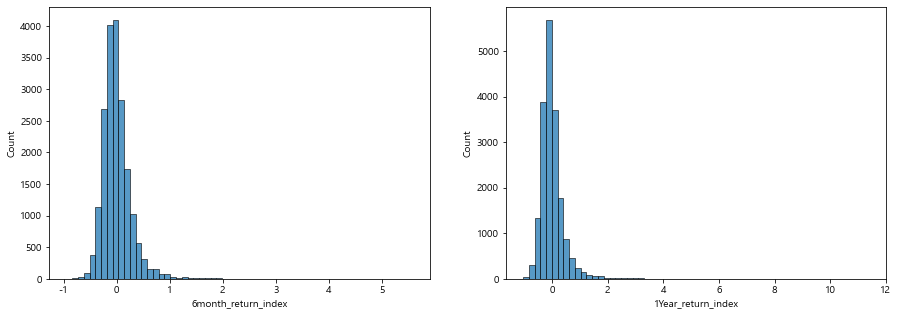

In [97]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data = df, x = (df['6month_return_index']), bins=60, ax = axes[0])
sns.histplot(data = df, x = (df['1Year_return_index']), bins=60, ax = axes[1])

<AxesSubplot:xlabel='6month_return_index'>

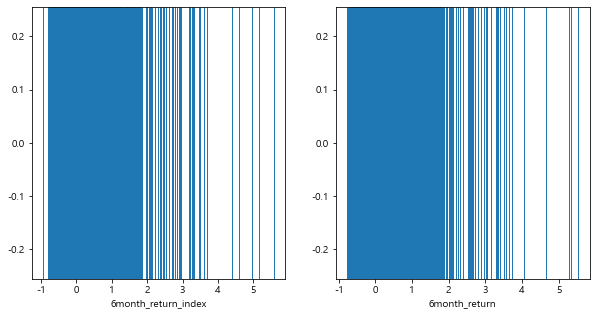

In [169]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.rugplot( x='6month_return', data=df, height=1, ax = axes[1])
sns.rugplot( x='6month_return_index', data=df, height=1,ax = axes[0])

<AxesSubplot:xlabel='1Year_return_index'>

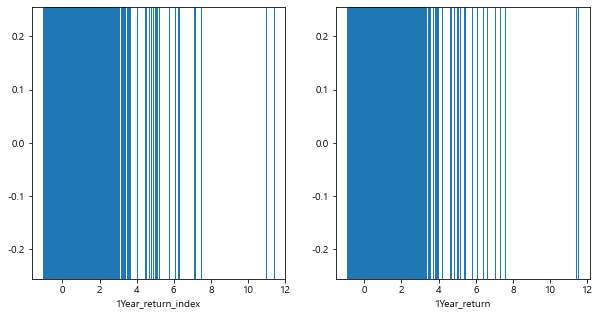

In [116]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.rugplot( x='1Year_return', data=df, height=1, ax = axes[1])
sns.rugplot( x='1Year_return_index', data=df, height=1,ax = axes[0])

In [ ]:
df1 = df['1Year_return_index'] <

In [ ]:
##################################

In [215]:
df_op = df[['투자의견','6month_log_return']]
df_op.dropna(inplace=True)

In [201]:
from sklearn.preprocessing import LabelEncoder

In [216]:
le = LabelEncoder()
df_op['투자의견'] = le.fit_transform(df_op['투자의견'])


In [209]:
le.classes_

array(['buy', 'neutral', 'sell', 'strongbuy'], dtype=object)

In [ ]:
df_op['투자의견'] 

In [217]:
import scipy.stats as stats
stats.pearsonr(df_op['투자의견'] ,df_op['6month_log_return'])

(0.0005776494711182741, 0.9356061520707677)

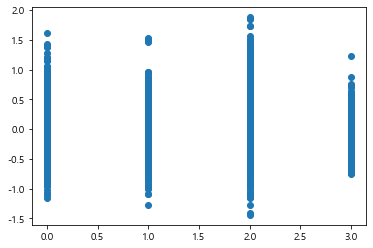

In [218]:
plt.scatter(df_op['투자의견'],df_op['6month_log_return'])

In [34]:
df_op = df[['투자의견','6month_log_return']]
df_op

,투자의견,6month_log_return
0,buy,-0.273711
1,buy,-0.240346
2,buy,-0.144764
3,buy,0.042431
4,buy,-0.077998
...,...,...
20288,strongbuy,0.013915
20289,strongbuy,-0.004057
20290,strongbuy,-0.384341
20291,strongbuy,-0.256375


In [36]:
df_op.isnull().sum()

투자의견                   0
6month_log_return    631
dtype: int64

In [38]:
df_op.dropna(inplace=True)

In [41]:
df_op = pd.get_dummies(df_op)
df_op

,6month_log_return,투자의견_buy,투자의견_neutral,투자의견_sell,투자의견_strongbuy
0,-0.273711,1,0,0,0
1,-0.240346,1,0,0,0
2,-0.144764,1,0,0,0
3,0.042431,1,0,0,0
4,-0.077998,1,0,0,0
...,...,...,...,...,...
20288,0.013915,0,0,0,1
20289,-0.004057,0,0,0,1
20290,-0.384341,0,0,0,1
20291,-0.256375,0,0,0,1


In [42]:
y = df_op['6month_log_return']
x = df_op.drop('6month_log_return',axis=1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [46]:
sv = SVR()
lsv=LinearSVR()
lr = LinearRegression()
ridge = Ridge(random_state=42)
lasso =  Lasso(random_state=42)
kn = KNeighborsRegressor()
dtr = DecisionTreeRegressor(random_state=42)
etr = ExtraTreesRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
abr = AdaBoostRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgb = LGBMRegressor(random_state=42)

In [47]:
models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test,y_test))
    print()

SVR
-0.001640042457385249
1.5012097583033679e-05

LinearSVR
-0.003158960991290982
-0.0007835289712851967

LinearRegression
0.000741491567505026
-0.0020304848546710552

Ridge
0.0008143418364542354
-0.0024145764800875824

Lasso
0.0
-0.001494839993701813

KNeighborsRegressor
-0.2177797891025146
-0.17537395426961444

DecisionTreeRegressor
0.0008143421755866243
-0.0024152044962386654

RandomForestRegressor
0.0008112293408105709
-0.0022963126451809313

ExtraTreesRegressor
0.0008143421755866243
-0.0024152044962386654

GradientBoostingRegressor
0.0008143421750121949
-0.002415157928798095

AdaBoostRegressor
-0.046638954281855494
-0.07228660743807658

XGBRegressor
0.0008143406910564588
-0.002412932191214301

LGBMRegressor
0.0008143421750124169
-0.0024151578803344176



In [49]:
df_op = df[['투자의견','6month_return']]
df_op.dropna(inplace=True)
df_op = pd.get_dummies(df_op)
y = df_op['6month_return']
x = df_op.drop('6month_return',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [50]:
models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test,y_test))
    print()

SVR
-0.018747713132250432
-0.010830243743553902

LinearSVR
-0.024017792448719044
-0.01529899908122001

LinearRegression
0.003953521300534946
-0.0017736309068168143

Ridge
0.0040288502478496024
-0.002234775529143862

Lasso
0.0
-0.0020362901068582406

KNeighborsRegressor
-0.15345853127617626
-0.13445373903038838

DecisionTreeRegressor
0.004028851050983495
-0.002236379116246301

RandomForestRegressor
0.0040260214412933815
-0.002186278934832586

ExtraTreesRegressor
0.004028851050983717
-0.002236379116246301

GradientBoostingRegressor
0.004028851048141435
-0.0022362508064641684

AdaBoostRegressor
-0.06575455219764592
-0.11395021320486642

XGBRegressor
0.004028850299060638
-0.0022343386442347235

LGBMRegressor
0.004028851048145654
-0.002236250907615034



In [51]:
df_op = df[['투자의견','1Year_log_return']]
df_op.dropna(inplace=True)
df_op = pd.get_dummies(df_op)
y = df_op['1Year_log_return']
x = df_op.drop('1Year_log_return',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [52]:
models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test,y_test))
    print()

SVR
-0.003265916830368143
-0.001976585238646633

LinearSVR
-0.004312658171073291
-0.003157717169077756

LinearRegression
0.0004621484110982621
0.0008273319539936486

Ridge
0.0004974021371187964
0.0007985604926616929

Lasso
0.0
-4.836039944056125e-07

KNeighborsRegressor
-0.03270878014373957
-0.04078503937702438

DecisionTreeRegressor
0.0004974023841717301
0.0007991723570601739

RandomForestRegressor
0.0004963135991259415
0.0007889160280523111

ExtraTreesRegressor
0.0004974023841717301
0.0007991723570601739

GradientBoostingRegressor
0.0004974023838208996
0.0007991643659926995

AdaBoostRegressor
-0.0037243323945377327
-0.004343986214287776

XGBRegressor
0.0004974014483544176
0.0007986563165263139

LGBMRegressor
0.0004974023838224539
0.0007991643171774143



In [53]:
df_op = df[['투자의견','1Year_return']]
df_op.dropna(inplace=True)
df_op = pd.get_dummies(df_op)
y = df_op['1Year_return']
x = df_op.drop('1Year_return',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [54]:
models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test,y_test))
    print()

SVR
-0.036898832967479755
-0.0306131325287331

LinearSVR
-0.041273926690727825
-0.034497682066053414

LinearRegression
0.003698692241654533
0.0025553501438365656

Ridge
0.003746101975355076
0.0024529044795149613

Lasso
0.0
-4.506454191810505e-06

KNeighborsRegressor
-0.0215907403188913
-0.024114268599444877

DecisionTreeRegressor
0.0037461026869948233
0.002453417883046205

RandomForestRegressor
0.0037449679330036068
0.0024751529038380404

ExtraTreesRegressor
0.0037461026869948233
0.002453417883046205

GradientBoostingRegressor
0.0037461026843519374
0.002453433953312656

AdaBoostRegressor
-0.0721360129011892
-0.060971295165052286

XGBRegressor
0.0037461020843246873
0.00245317289218272

LGBMRegressor
0.0037461026843529366
0.0024534339755512002



In [55]:
df

,작성일,개장일,Market,Name,code,Sector,adjusted_Open,adjusted_Close,report_Open,report_Close,괴리율,adjusted_TargetPrice,report_TargetPrice,액면비율,Index_return_6,Index_return_1Y,6month_개장일,6month_return,6month_log_return,6month_Close,1year_개장일,1Year_return,1Year_log_return,1Year_Close,투자의견,idx,작성자,제공출처
0,2018-04-18,2018-04-18,^KS11,한화생명,088350,보험업,6160.0,6160.0,6160,6160,0.785714,11000.00000,11000,1.000000,-13.502523,-10.734359,2018-10-15,-0.239448,-0.273711,4685.0,2019-04-18,-0.356331,-0.440571,3965.0,buy,473108,박혜진,이베스트증권
1,2018-05-31,2018-05-31,^KS11,한화생명,088350,보험업,5740.0,5570.0,5740,5570,0.620209,9300.00000,9300,1.000000,-13.354880,-15.735388,2018-11-27,-0.213645,-0.240346,4380.0,2019-05-31,-0.423698,-0.551124,3210.0,buy,479661,성용훈,한화투자증권
2,2018-09-18,2018-09-18,^KS11,한화생명,088350,보험업,4880.0,4860.0,4880,4860,0.229508,6000.00000,6000,1.000000,-5.754484,-10.318409,2019-03-15,-0.134774,-0.144764,4205.0,2019-09-18,-0.466049,-0.627452,2595.0,buy,493832,김지영,교보증권
3,2021-02-19,2021-02-19,^KS11,한화생명,088350,보험업,3120.0,3230.0,3120,3230,0.121795,3500.00000,3500,1.000000,1.651097,NaN,2021-08-18,0.043344,0.042431,3370.0,2022-02-18,NaN,NaN,NaN,buy,583203,정태준,유안타증권
4,2012-11-09,2012-11-09,^KS11,한화생명,088350,보험업,7410.0,7330.0,7410,7330,0.214575,9000.00000,9000,1.000000,2.732600,4.224928,2013-05-08,-0.075034,-0.077998,6780.0,2013-11-08,-0.096862,-0.101880,6620.0,buy,293653,이치영,이트레이드증권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20288,2015-03-17,2015-03-17,^KS11,사조산업,007160,어로 어업,79600.0,78500.0,79600,78500,1.010050,160000.00000,160000,1.000000,-4.361772,-2.709973,2015-09-11,0.014013,0.013915,79600.0,2016-03-16,-0.185987,-0.205779,63900.0,strongbuy,345498,김승,SK증권
20289,2015-06-12,2015-06-12,^KS11,까뮤이앤씨,013700,건물 건설업,1245.0,1235.0,12450,12350,0.927711,2400.00000,24000,0.100000,-5.064392,-1.683092,2015-12-09,-0.004049,-0.004057,1230.0,2016-06-10,0.004049,0.004040,1240.0,strongbuy,353325,"이태경,한기현",현대증권
20290,2015-06-01,2015-06-01,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6425.0,6675.0,12850,13350,0.867704,12000.00000,24000,0.500000,-3.006715,-2.414314,2015-11-27,-0.319101,-0.384341,4545.0,2016-05-31,-0.486142,-0.665809,3430.0,strongbuy,352285,이상우,유진투자증권
20291,2015-03-17,2015-03-17,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6750.0,7075.0,13500,14150,0.777778,12000.00000,24000,0.500000,5.317193,9.022878,2015-09-11,-0.226148,-0.256375,5475.0,2016-03-16,-0.492580,-0.678415,3590.0,strongbuy,345568,이상우,유진투자증권


In [67]:
df_op = df[['괴리율','1Year_return']]
df_op = df_op.drop(df_op[(df_op.괴리율== -1 ) | (df_op.괴리율== 'inf' )|(df_op.괴리율.isnull())].index.tolist(), axis=0)
df_op.dropna(inplace=True)
# df_op = pd.get_dummies(df_op)
y = df_op['1Year_return']
x = df_op.drop('1Year_return',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [68]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train_stan,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_stan, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_stan,y_test))
    print()

SVR
-0.026249909995232468
-0.0374163711712765

LinearSVR
-0.03423831396418198
-0.03881207810958398

LinearRegression
0.000673341336467348
-0.00043003533372032443

Ridge
0.0006733413303084967
-0.0004299818739836869

Lasso
0.0
-0.00020449915465436952

KNeighborsRegressor
0.1697912552574331
-0.19067453117052735

DecisionTreeRegressor
0.5406764760627916
-0.5687627080454558

RandomForestRegressor
0.46226485865543654
-0.33390730625577425

ExtraTreesRegressor
0.5406764760627916
-0.41888711435604

GradientBoostingRegressor
0.04807596028305727
-0.029621925315549413

AdaBoostRegressor
-0.1972332393146834
-0.2619396827594107

XGBRegressor
0.20889119038773396
-0.08251837733704703

LGBMRegressor
0.025688962631018053
-0.023994814423459188



In [69]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_min = scaler.transform(x_train)
x_test_min = scaler.transform(x_test)


models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]


for m in models :
    m.fit(x_train_min,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_min, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_min,y_test))
    print()

SVR
-0.02624990999523047
-0.03741637117127361

LinearSVR
-0.027166690701171614
-0.031439281044955525

LinearRegression
0.000673341336467348
-0.00043003533372032443

Ridge
0.0005575130798115557
-0.00025554917202574856

Lasso
0.0
-0.00020449915465436952

KNeighborsRegressor
0.1661808651221519
-0.182998275123051

DecisionTreeRegressor
0.5406307168898619
-0.5686177628044551

RandomForestRegressor
0.4622321952583094
-0.3338752220508263

ExtraTreesRegressor
0.5406446786933126
-0.41534497198410336

GradientBoostingRegressor
0.04807596028305727
-0.029621925315549413

AdaBoostRegressor
-0.1972332393146834
-0.2619396827594107

XGBRegressor
0.20889119038773396
-0.08251837733704703

LGBMRegressor
0.025210030207945433
-0.025512497826220892



In [70]:
df_op = df[['괴리율','1Year_log_return']]
df_op = df_op.drop(df_op[(df_op.괴리율== -1 ) | (df_op.괴리율== 'inf' )|(df_op.괴리율.isnull())].index.tolist(), axis=0)
df_op.dropna(inplace=True)
# df_op = pd.get_dummies(df_op)
y = df_op['1Year_log_return']
x = df_op.drop('1Year_log_return',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [71]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train_stan,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_stan, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_stan,y_test))
    print()

SVR
0.0012692715940167965
-0.007118824567550419

LinearSVR
-0.0013362674043462253
-0.003009443810602974

LinearRegression
0.0005768084661104123
-0.0002682526153428011

Ridge
0.0005768084608342994
-0.0002682082197789093

Lasso
0.0
-9.174238147879876e-05

KNeighborsRegressor
0.16467682465372246
-0.19853588720016324

DecisionTreeRegressor
0.5670177253098467
-0.570848806342805

RandomForestRegressor
0.483937576891484
-0.32673378972524203

ExtraTreesRegressor
0.5670177253098467
-0.4305153272817086

GradientBoostingRegressor
0.03584887858113406
-0.02046690542020979

AdaBoostRegressor
-0.03582559337458813
-0.03312500931188622

XGBRegressor
0.18366215496227445
-0.06995915563888544

LGBMRegressor
0.027772845947703018
-0.02660133156283906



In [72]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_min = scaler.transform(x_train)
x_test_min = scaler.transform(x_test)


models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]


for m in models :
    m.fit(x_train_min,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_min, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_min,y_test))
    print()

SVR
0.0012692715940225696
-0.007118824567544868

LinearSVR
-0.001852660111629545
-0.0034516037817313716

LinearRegression
0.0005768084661104123
-0.0002682526153428011

Ridge
0.0004775858052762372
-0.00012520598018750384

Lasso
0.0
-9.174238147879876e-05

KNeighborsRegressor
0.1620362465641737
-0.18918370281176955

DecisionTreeRegressor
0.5668908631766243
-0.570515850804006

RandomForestRegressor
0.48384306732706006
-0.3266598544479582

ExtraTreesRegressor
0.5669360967265613
-0.42946553256681064

GradientBoostingRegressor
0.03584887858113406
-0.02046690542020979

AdaBoostRegressor
-0.03582559337458813
-0.03312500931188622

XGBRegressor
0.18366215496227445
-0.06995915563888544

LGBMRegressor
0.0264100391089086
-0.027666094971228627



In [81]:
df_op = df[['괴리율','투자의견']]
df_op = df_op.drop(df_op[(df_op.괴리율== -1 ) | (df_op.괴리율== 'inf' )|(df_op.괴리율.isnull())].index.tolist(), axis=0)
df_op.dropna(inplace=True)
df_op = pd.get_dummies(df_op)
y = df_op['괴리율']
x = df_op.drop('괴리율',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [82]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train_stan,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_stan, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_stan,y_test))
    print()

SVR
0.05344691896194087
0.005256141336510534

LinearSVR
0.04951327905283154
0.004865051453945224

LinearRegression
0.06634519199875366
0.005336184838672042

Ridge
0.06634531160761281
0.005333356998967309

Lasso
0.0
-0.00016725632097336351

KNeighborsRegressor
0.04107711927609348
0.004940937455495509

DecisionTreeRegressor
0.06634531189172832
0.005333315721687715

RandomForestRegressor
0.06634481257242242
0.0053385088343621545

ExtraTreesRegressor
0.06634531189172843
0.005333315721687715

GradientBoostingRegressor
0.06634531184492143
0.005333314836145742

AdaBoostRegressor
-0.6810723358848803
-0.05018296213514173

XGBRegressor
0.06634531124611154
0.00533349966762231

LGBMRegressor
0.06634531184492176
0.005333314868978589



In [83]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_min = scaler.transform(x_train)
x_test_min = scaler.transform(x_test)


models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]


for m in models :
    m.fit(x_train_min,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_min, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_min,y_test))
    print()

SVR
0.0534484392041662
0.005256900676089193

LinearSVR
0.052298150186231185
0.0050046099569628355

LinearRegression
0.06633447375317036
0.005359047794624372

Ridge
0.06634474718206196
0.005341305768118421

Lasso
0.0
-0.00016725632097336351

KNeighborsRegressor
0.00978106232167597
0.00021541347578557524

DecisionTreeRegressor
0.06634531189172832
0.005333315721687715

RandomForestRegressor
0.06634481257242242
0.0053385088343621545

ExtraTreesRegressor
0.06634531189172843
0.005333315721687715

GradientBoostingRegressor
0.06634531184492143
0.005333314836145742

AdaBoostRegressor
-0.6810723358848803
-0.05018296213514173

XGBRegressor
0.06634531124611154
0.00533349966762231

LGBMRegressor
0.06634531184492176
0.005333314868978589



In [84]:
df_op = df[['괴리율','투자의견','1Year_log_return']]
df_op = df_op.drop(df_op[(df_op.괴리율== -1 ) | (df_op.괴리율== 'inf' )|(df_op.괴리율.isnull())].index.tolist(), axis=0)
df_op.dropna(inplace=True)
df_op = pd.get_dummies(df_op)
y = df_op['1Year_log_return']
x = df_op.drop('1Year_log_return',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [85]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stan = scaler.transform(x_train)
x_test_stan = scaler.transform(x_test)

models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]

for m in models :
    m.fit(x_train_stan,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_stan, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_stan,y_test))
    print()

SVR
0.0036381293697641537
-0.006888799985501404

LinearSVR
-0.0027594504727872504
-0.008202437720562505

LinearRegression
0.0020235992299850736
0.0009756131027238713

Ridge
0.0020235992037365147
0.0009756946635411934

Lasso
0.0
-9.174238147879876e-05

KNeighborsRegressor
0.1808521092887041
-0.19682007835581872

DecisionTreeRegressor
0.6467632044319777
-0.6681148513978774

RandomForestRegressor
0.5444766087513979
-0.3525663577268312

ExtraTreesRegressor
0.6467632044319777
-0.5136793532673483

GradientBoostingRegressor
0.03887362122436122
-0.017614827674489186

AdaBoostRegressor
-0.006423190515206123
-0.008213691158846848

XGBRegressor
0.22107796251154266
-0.07654677564052004

LGBMRegressor
0.04520326084812787
-0.0266894171501324



In [86]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_min = scaler.transform(x_train)
x_test_min = scaler.transform(x_test)


models = [sv,lsv,lr, ridge, lasso, kn, dtr, rfr,etr, gbr, abr, xgb, lgb ]


for m in models :
    m.fit(x_train_min,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_min, y_train))
#     print(m.score(x_valid, y_valid))
    print(m.score(x_test_min,y_test))
    print()

SVR
0.0011560127544839593
-0.0011068795429201028

LinearSVR
0.0006709518067085085
-0.0014778054971129606

LinearRegression
0.0020235992299850736
0.0009756131027238713

Ridge
0.0018302273640516953
0.0011378388027529773

Lasso
0.0
-9.174238147879876e-05

KNeighborsRegressor
0.17960854993653796
-0.20465402617999207

DecisionTreeRegressor
0.6466363422987551
-0.6677818958590784

RandomForestRegressor
0.544381259805162
-0.352552587386634

ExtraTreesRegressor
0.6466749268128267
-0.5191455443127251

GradientBoostingRegressor
0.03887362122436122
-0.017614827674489186

AdaBoostRegressor
-0.006423190515206123
-0.008213691158846848

XGBRegressor
0.22107796251154266
-0.07654677564052004

LGBMRegressor
0.04389684944926031
-0.029604587967579032

